In [1]:
a = [{3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}, {0, 1, 2, 45, 20, 21}]

In [2]:
for new_idx, range_set in enumerate(a):
    print(new_idx, range_set)

0 {3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
1 {22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}
2 {0, 1, 2, 20, 21, 45}


0
0
0
0
0


In [19]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from robustness.tools.vis_tools import show_image_row

# Charger le dataset
train_dataset = torch.load("train_dataset_superclass.pt")
test_dataset = torch.load("test_dataset_superclass.pt")

# Afficher la structure du dataset
print(f"Nombre d'images dans le train set : {len(train_dataset)}")
print(f"Nombre d'images dans le test set : {len(test_dataset)}")

# Vérifier les labels du dataset
superclass_map = {
    "bird": [
        "n02051845", "n01622779", "n01833805", "n01829413", "n01828970",
        "n01824575", "n01820546", "n01818515", "n01819313", "n01843383",
        "n01855032", "n01855672", "n01860187", "n01614925", "n01514859", "n02058221"
    ],
    "aquatic": [
        "n01484850", "n01443537", "n01494475", "n02643566", "n02066245", "n02071294"
    ],
    "terrestrial": [
        "n02398521", "n02504013", "n02410509", "n02437312", "n02509815", "n02510455",
        "n02128385", "n02127052", "n02125311", "n02123597", "n02129604", "n02129165",
        "n02123159", "n02088364", "n02088238", "n02500267", "n02492035", "n02486410",
        "n02487347", "n02481823", "n02480855", "n02480495", "n02391049"
    ]
}


Nombre d'images dans le train set : 34615
Nombre d'images dans le test set : 11538


In [20]:
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=5, shuffle=False, num_workers=4)

In [21]:
index_to_superclass = {0: 'bird', 1: 'terrestrial', 2: 'aquatic'}

tensor([1, 2, 1, 0, 0])
tensor([0, 2, 1, 1, 0])
tensor([2, 1, 1, 1, 1])
tensor([0, 0, 0, 1, 1])
tensor([1, 1, 0, 2, 1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0061780736..1.0063835].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.01169945..1.0055416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004915529..1.0018356].


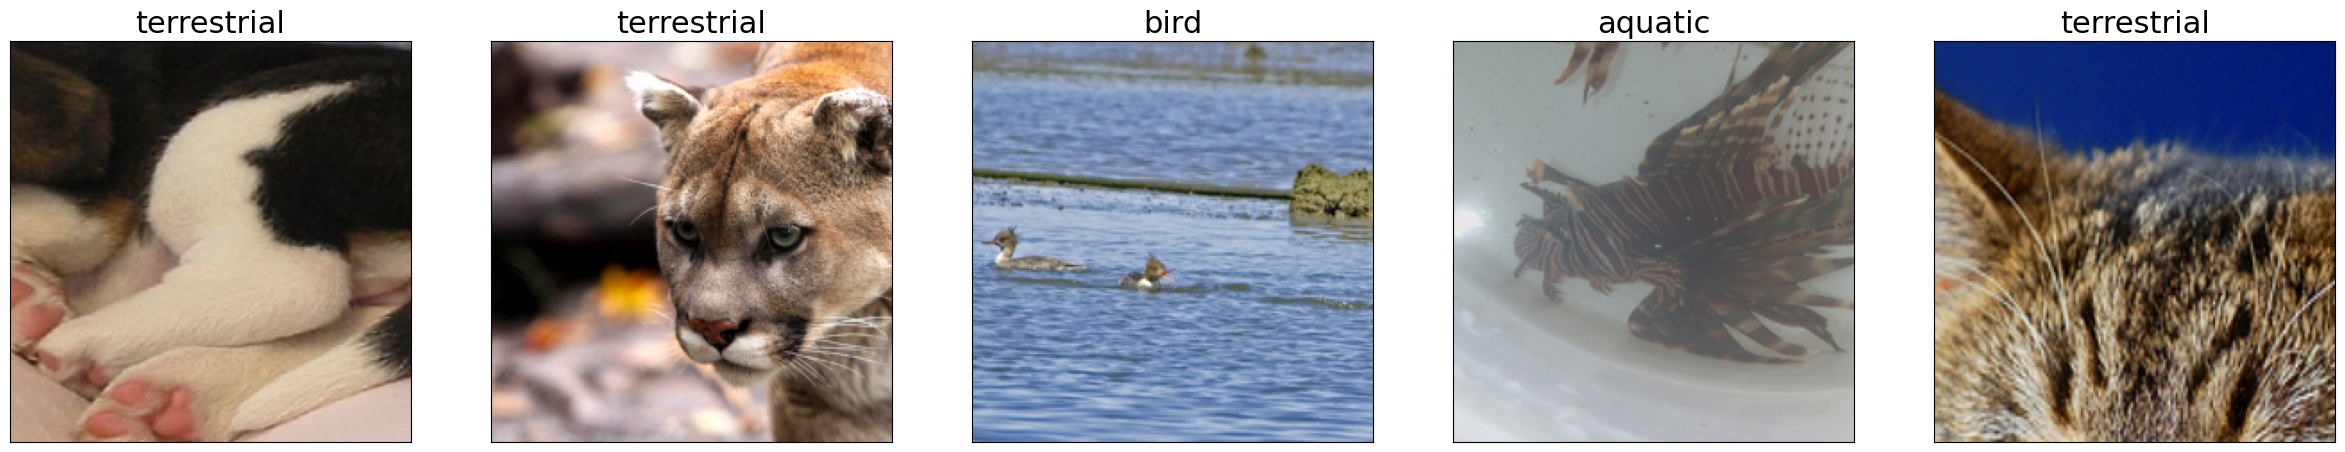

In [22]:
from robustness.tools.vis_tools import show_image_row
import matplotlib.pyplot as plt

# Afficher quelques labels pour vérifier
iterator = iter(train_loader)

for _ in range(5):
    im, lab = next(iterator)
    print(lab)

# Afficher les images avec leur label
show_image_row([im],
               tlist=[[index_to_superclass[int(k)].split(',')[0] for k in lab]],
               size=(6, 6),
               fontsize=22)


In [17]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Fonction pour tester chaque image du DataLoader
def find_corrupt_image(data_loader):
    for batch_idx, (images, labels) in enumerate(data_loader):
        for i in range(images.shape[0]):
            try:
                _ = images[i]  # Tentative d'accès à l'image
            except Exception as e:
                print(f"⚠️ Image corrompue trouvée dans le batch {batch_idx}, index {i}")
                print(f"Erreur : {e}")
                return batch_idx, i
    print("✅ Aucune image corrompue détectée.")
    return None

# Tester sur les deux ensembles
print("🔎 Vérification du train_loader...")
find_corrupt_image(train_loader)

print("\n🔎 Vérification du test_loader...")
find_corrupt_image(test_loader)


🔎 Vérification du train_loader...


OSError: Caught OSError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "D:\Programmation\Projet\ExplicationAI\venv\PER\lib\site-packages\torch\utils\data\_utils\worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "D:\Programmation\Projet\ExplicationAI\venv\PER\lib\site-packages\torch\utils\data\_utils\fetch.py", line 58, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "D:\Programmation\Projet\ExplicationAI\venv\PER\lib\site-packages\torch\utils\data\_utils\fetch.py", line 58, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "D:\Programmation\Projet\ExplicationAI\venv\PER\lib\site-packages\robustness\tools\folder.py", line 146, in __getitem__
    sample = self.loader(path)
  File "D:\Programmation\Projet\ExplicationAI\venv\PER\lib\site-packages\robustness\tools\folder.py", line 192, in default_loader
    return pil_loader(path)
  File "D:\Programmation\Projet\ExplicationAI\venv\PER\lib\site-packages\robustness\tools\folder.py", line 175, in pil_loader
    return img.convert('RGB')
  File "D:\Programmation\Projet\ExplicationAI\venv\PER\lib\site-packages\PIL\Image.py", line 984, in convert
    self.load()
  File "D:\Programmation\Projet\ExplicationAI\venv\PER\lib\site-packages\PIL\ImageFile.py", line 297, in load
    raise OSError(msg)
OSError: image file is truncated (16 bytes not processed)


In [16]:
from PIL import Image
import os

def check_images(dataset):
    for idx in range(len(dataset)):
        path, _ = dataset.samples[idx]  # Récupère le chemin de l'image
        try:
            img = Image.open(path)
            img.verify()  # Vérifie si l'image est valide
        except Exception as e:
            print(f"❌ Image corrompue trouvée : {path}")
            print(f"Erreur : {e}")
            return path  # Retourne le chemin de l'image corrompue
    print("✅ Toutes les images sont valides.")
    return None

# Vérification des images du dataset
print("🔍 Vérification du train_dataset...")
corrupt_image = check_images(train_dataset)

if corrupt_image:
    print(f"⚠️ Supprime ou remplace cette image : {corrupt_image}")


🔍 Vérification du train_dataset...
✅ Toutes les images sont valides.


In [18]:
from PIL import Image
import os
import torchvision.transforms as transforms

def check_images_with_conversion(dataset):
    transform = transforms.ToTensor()  # Transformation utilisée par DataLoader

    for idx in range(len(dataset)):
        path, _ = dataset.samples[idx]
        try:
            img = Image.open(path).convert("RGB")  # On simule le chargement réel
            _ = transform(img)  # On applique la conversion en Tensor pour voir si ça plante
        except Exception as e:
            print(f"❌ Image corrompue détectée : {path}")
            print(f"Erreur : {e}")
            return path  # Retourne l'image fautive

    print("✅ Toutes les images sont valides après conversion.")
    return None

# Vérification des images avec conversion
print("🔍 Vérification approfondie du train_dataset...")
corrupt_image = check_images_with_conversion(train_dataset)

if corrupt_image:
    print(f"⚠️ Supprime ou remplace cette image : {corrupt_image}")


🔍 Vérification approfondie du train_dataset...
❌ Image corrompue détectée : C:\Annexe_D\PER\data\train\n02487347\n02487347_810.jpeg
Erreur : image file is truncated (16 bytes not processed)
⚠️ Supprime ou remplace cette image : C:\Annexe_D\PER\data\train\n02487347\n02487347_810.jpeg
